## DATA 622 - Assignment 1: Exploratory Data Analysis

### Introduction

This assignment focuses on one of the most important aspects of data science, Exploratory Data Analysis (EDA). Many surveys show that data scientists spend 60-80% of their time on data preparation. EDA allows you to identify data gaps & data imbalances, improve data quality, create better features and gain a deep understanding of your data before doing model training - and that ultimately helps train better models. In machine learning, there is a saying - "better data beats better algorithms" - meaning that it is more productive to spend time improving data quality than improving the code to train the model.

This will be an exploratory exercise, so feel free to show errors and warnings that arise during the analysis.

### Dataset

A Portuguese bank conducted a marketing campaign (phone calls) to predict if a client will subscribe to a term deposit  The records of their efforts are available in the form of a dataset. The objective here is to apply machine learning techniques to analyze the dataset and figure out most effective tactics that will help the bank in next campaign to persuade more customers to subscribe to the bank's term deposit. Download the Bank Marketing Dataset from: https://archive.ics.uci.edu/dataset/222/bank+marketing

### Assignment

#### Exploratory Data Analysis

Review the structure and content of the data and answer questions such as:
- Are the features (columns) of your data correlated?
- What is the overall distribution of each variable?
- Are there any outliers present?
- What are the relationships between different variables?
- How are categorical variables distributed?
- Do any patterns or trends emerge in the data?
- What is the central tendency and spread of each variable?
- Are there any missing values and how significant are they? 

#### Algorithm Selection

Now you have completed the EDA, what Algorithms would suit the business purpose for the dataset. Answer questions such as:

- Select two or more machine learning algorithms presented so far that could be used to train a model (no need to train models - I am only looking for your recommendations).
- What are the pros and cons of each algorithm you selected?
- Which algorithm would you recommend, and why?
- Are there labels in your data? Did that impact your choice of algorithm?
- How does your choice of algorithm relates to the dataset?
- Would your choice of algorithm change if there were fewer than 1,000 data records, and why? 

#### Pre-processing

Now you have done an EDA and selected an Algorithm, what pre-processing (if any) would you require for:

- Data Cleaning - improve data quality, address missing data, etc.
- Dimensionality Reduction - remove correlated/redundant data than will slow down training
- Feature Engineering - use of business knowledge to create new features
- Sampling Data - using sampling to resize datasets
- Data Transformation - regularization, normalization, handling categorical variables
- Imbalanced Data - reducing the imbalance between classes

### Load Libraries

In [ ]:
## load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import plotly.express as px
import matplotlib.dates as mdates


/var/folders/h4/zjq554hs0b57vqfcrc5738wh0000gn/T/ipykernel_78806/900087071.py:9: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


### Load Data

In [2]:
bank_full_url = 'https://raw.githubusercontent.com/eddiexunyc/ml_big_data_work/refs/heads/main/Assignment%201/bank/bank-full.csv'
bank_full = pd.read_csv(bank_full_url, sep=';')
bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [3]:
bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
bank_full.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [5]:
bank_full.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [13]:
bank_full.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [6]:
for col in bank_full.columns:
    print(f"{col}: {bank_full[col].value_counts().get('unknown', 0)} unknowns")

age: 0 unknowns
job: 288 unknowns
marital: 0 unknowns
education: 1857 unknowns
default: 0 unknowns
balance: 0 unknowns
housing: 0 unknowns
loan: 0 unknowns
contact: 13020 unknowns
day: 0 unknowns
month: 0 unknowns
duration: 0 unknowns
campaign: 0 unknowns
pdays: 0 unknowns
previous: 0 unknowns
poutcome: 36959 unknowns
y: 0 unknowns


For this assignment, the full data for bank marketing is selected to have a better understanding and to determine which algorithm (kNN, Bayes Naives, and LDA) is the best approach to predict whether a client is likely to subscribe to a financial product offered by the bank. The initial review shows that there are 16 predictor columns (7 of them are numerical) and 45211 rows of data. The target variable in the data set is `y`. There is no null value, but there are duplicate values in some of the columns with the `balance` variable having the highest count. There are signicant counts of unknown or missing values in some of the columns such as `education`, `contact`, and `poutcome` variable. 

### Exploratory Data Analysis

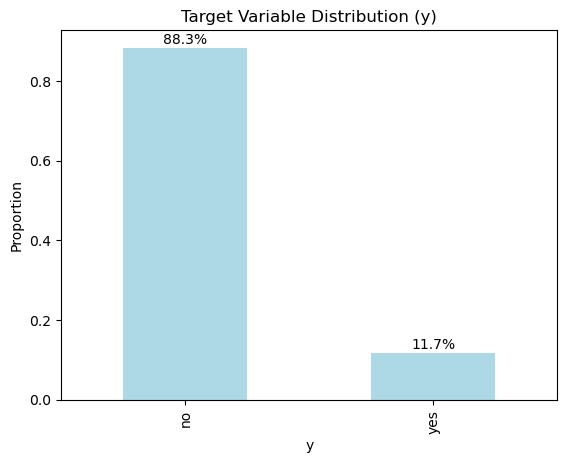

In [30]:
# target variable distribution
ax = bank_full['y'].value_counts(normalize=True).plot(kind='bar', color='lightblue')

plt.title("Target Variable Distribution (y)")
plt.ylabel("Proportion")

# display percentages
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,   
        height + 0.01,                  
        f'{height * 100:.1f}%',        
        ha='center')

plt.show()

Based on the target variable `y`, it shows that the current market strategy is not that successful as majority of the client (88%) have selected no to their subscription.

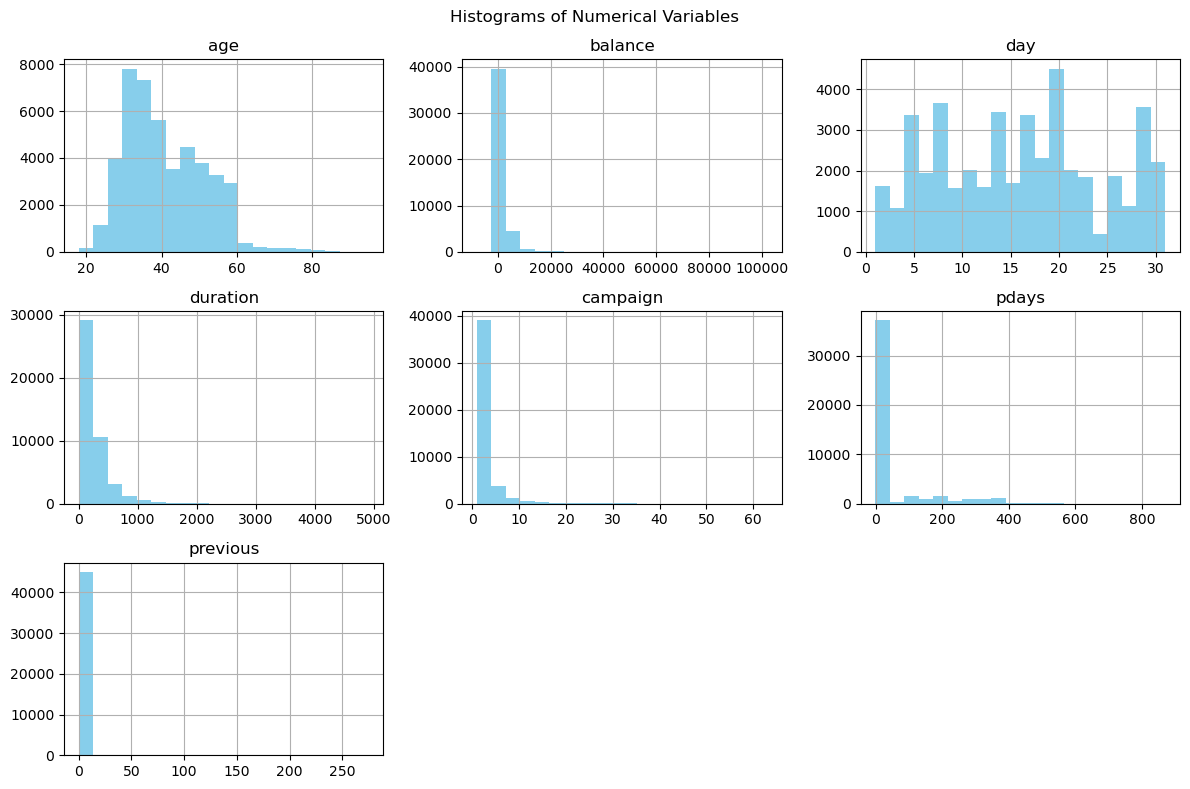

In [ ]:
# histogram on numerical variables
num_cols = bank_full.select_dtypes(include=np.number).columns.tolist()
bank_full[num_cols].hist(bins=20, figsize=(12, 8), color='skyblue')
plt.suptitle("Histograms of Numerical Variables")
plt.tight_layout()
plt.show()

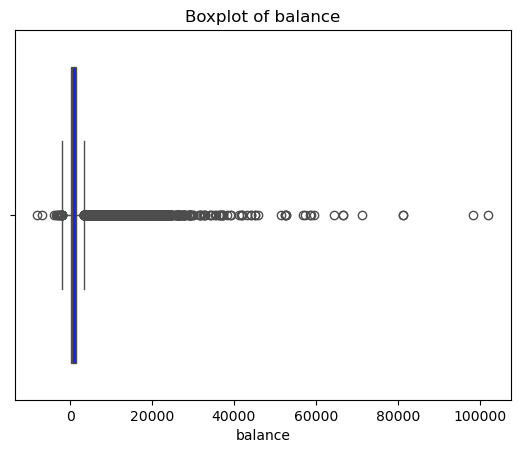

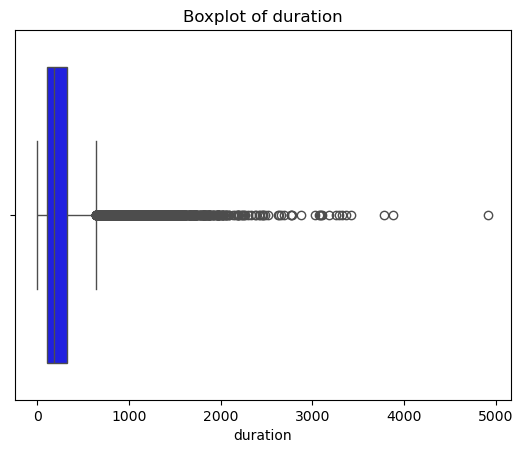

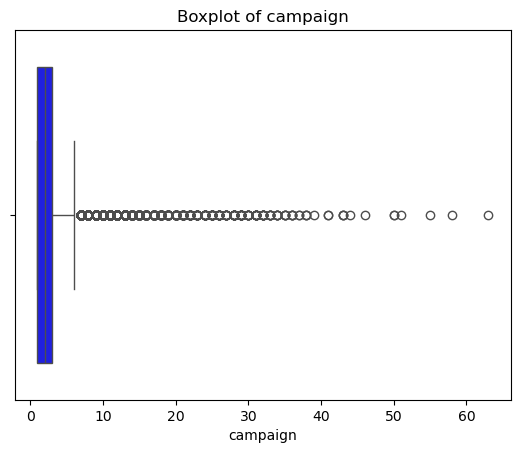

In [36]:
# boxplots for outliners found on the histgram
num_cols_selected = ['balance','duration','campaign']
for col in num_cols_selected:
    sns.boxplot(x=bank_full[col], color='blue')
    plt.title(f"Boxplot of {col}")
    plt.show()

For numerical variables, the histogram shows that all variables are right-skewed except for `day` variable. Not only that, it appears that there are outliers identified on `balance`, `duration`, and `campaign` variable. The boxplot shows for those identified variables, they have high outliers that are very significant and may impact the algorithm.

/var/folders/h4/zjq554hs0b57vqfcrc5738wh0000gn/T/ipykernel_78806/631552117.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sub_rate = bank_full.groupby('age_group')['subscribed'].mean().reset_index()
/var/folders/h4/zjq554hs0b57vqfcrc5738wh0000gn/T/ipykernel_78806/631552117.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_sub_rate, x='Age Group', y='Subscription Rate', palette='viridis')


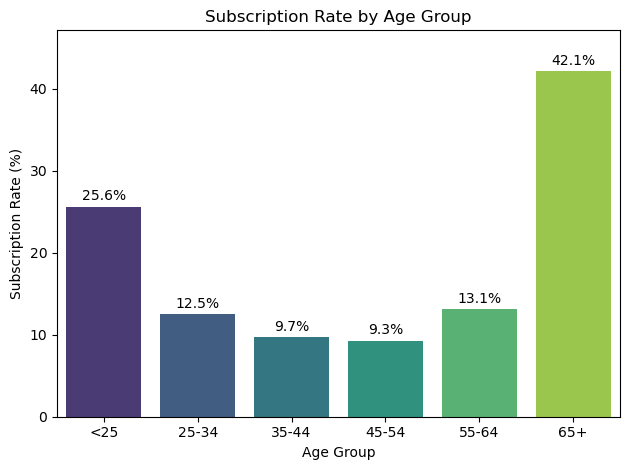

In [37]:
# create age group and subscription ratecolumn and label
bins = [0, 24, 34, 44, 54, 64, 100]
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']
bank_full['age_group'] = pd.cut(bank_full['age'], bins=bins, labels=labels, right=True)

bank_full['subscribed'] = bank_full['y'].map({'yes': 1, 'no': 0})

# calculate the subscription rate
age_sub_rate = bank_full.groupby('age_group')['subscribed'].mean().reset_index()
age_sub_rate.columns = ['Age Group', 'Subscription Rate']
age_sub_rate['Subscription Rate'] *= 100  

# plot with the percentage
sns.barplot(data=age_sub_rate, x='Age Group', y='Subscription Rate', palette='viridis')
for i, row in age_sub_rate.iterrows():
    plt.text(i, row['Subscription Rate'] + 0.8, f"{row['Subscription Rate']:.1f}%", ha='center')

plt.title("Subscription Rate by Age Group")
plt.ylabel("Subscription Rate (%)")
plt.xlabel("Age Group")
plt.ylim(0, age_sub_rate['Subscription Rate'].max() + 5)
plt.tight_layout()
plt.show()

Since `day` variable is not skewed, it is further drilled down into age groups. The graph shows that there are high subscription rates with clients that are under 25 and over 65. There is a low subscription rate for clients that are between 35 to 54 years old.

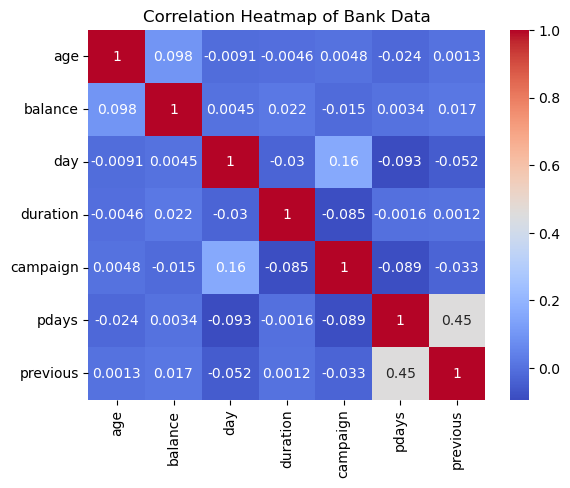

In [19]:
# correlation map
correlation = bank_full.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Bank Data")
plt.show()

In terms of correlation, the heatmap shows that there is a strong positive correlation between `pdays` and `previous` variables. There is also a strong positive correlation between `campaign` and `day` variable. Interestingly, there is a negative correlation between `pdays` and `day` variable.

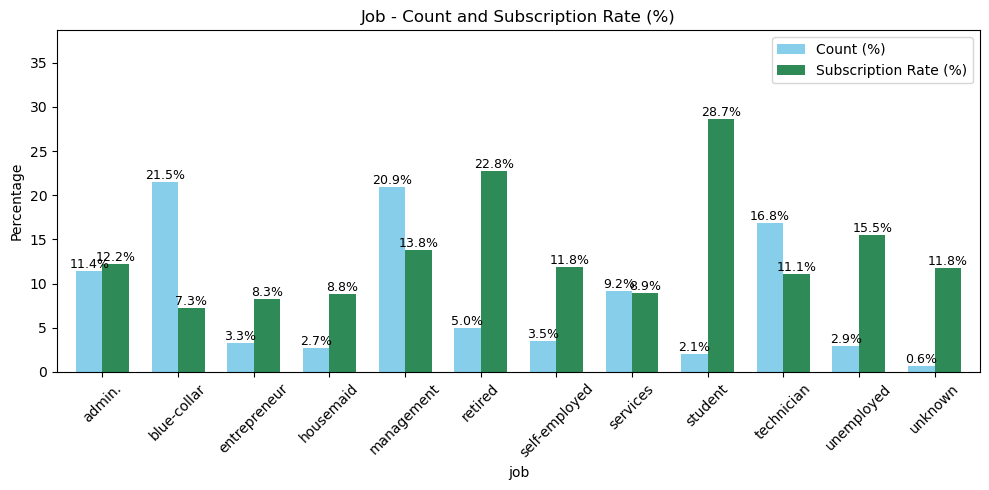

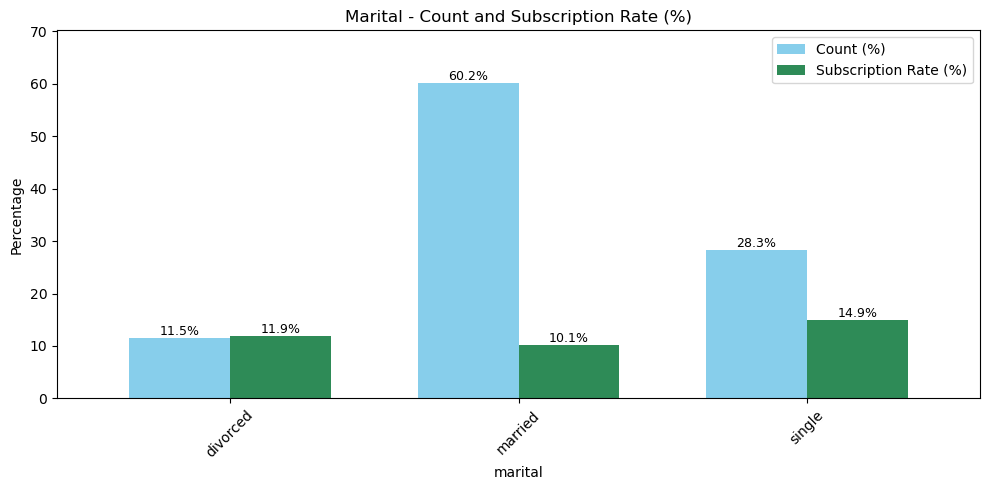

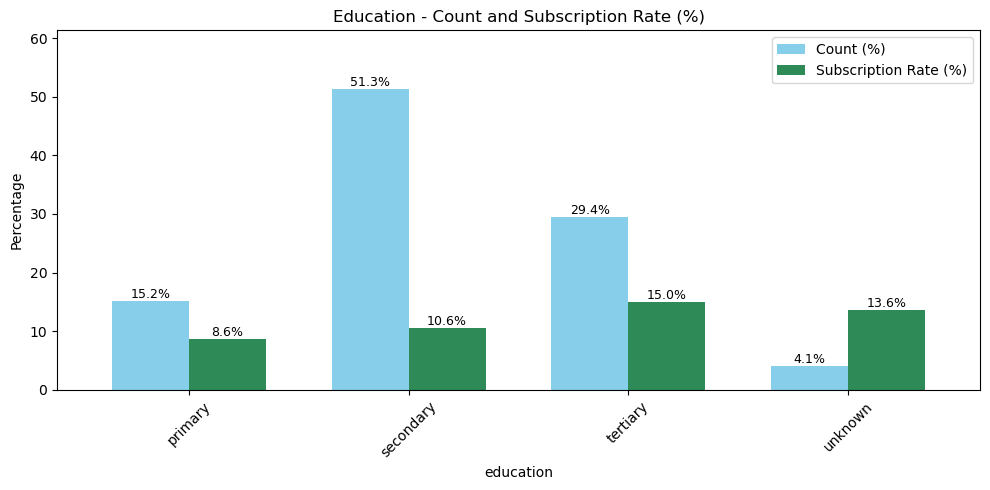

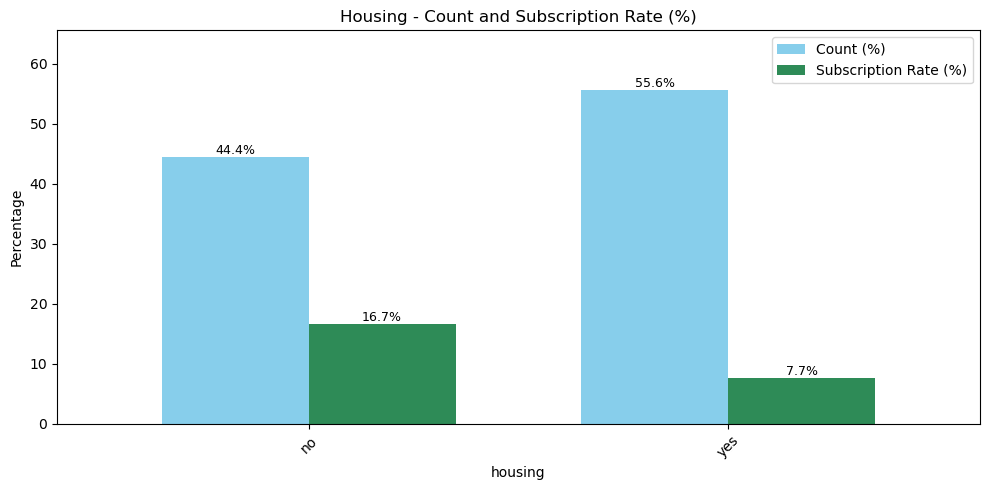

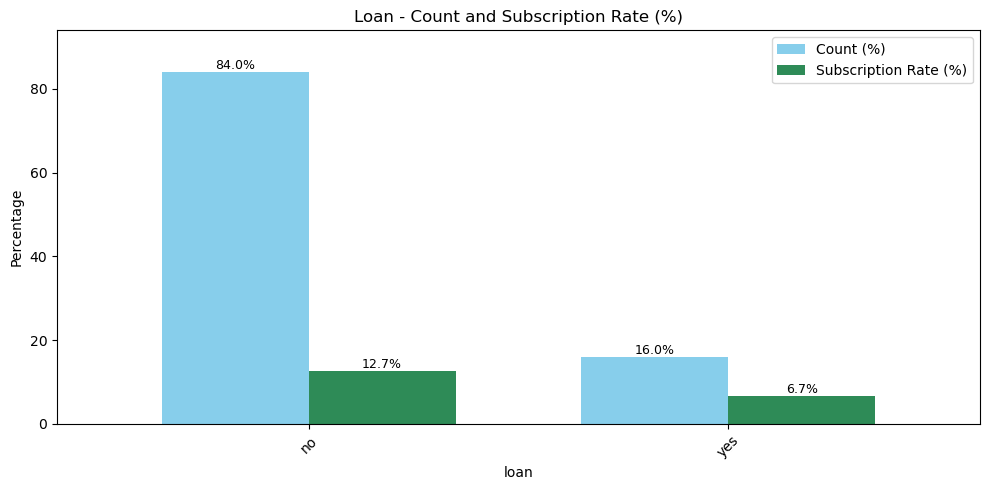

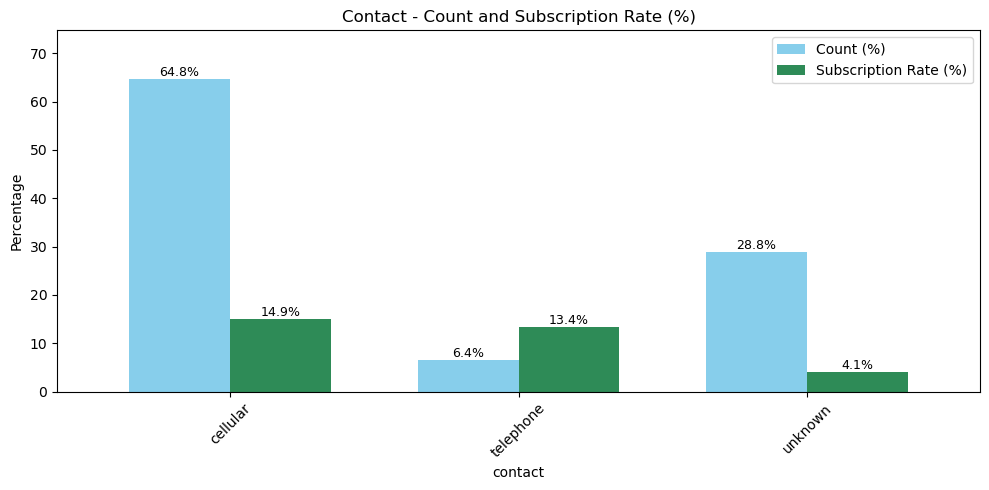

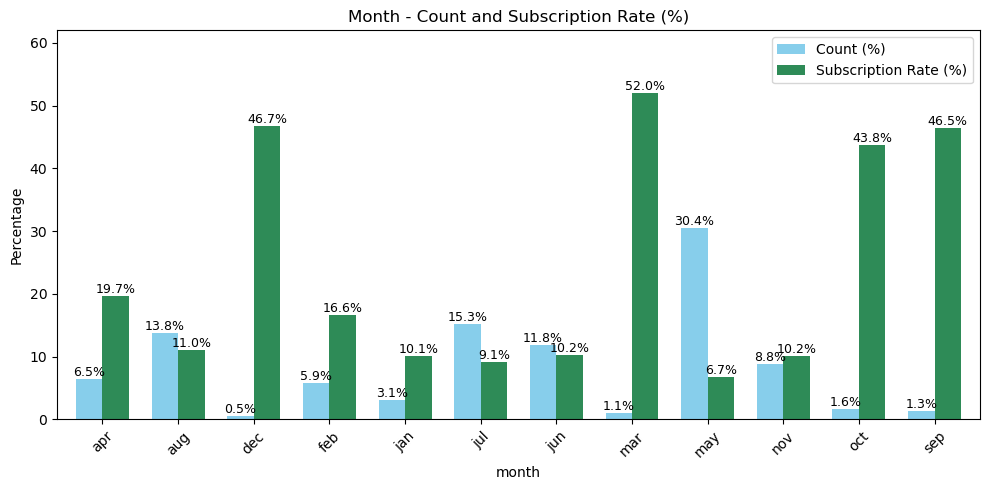

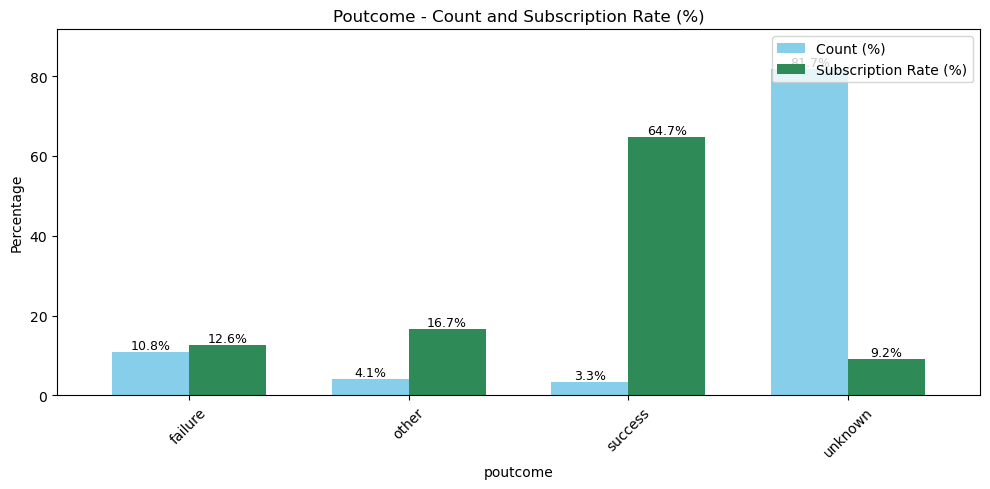

In [46]:
# distribution on categorical variables with subscription rate
cat_cols = bank_full.select_dtypes(include='object').columns.tolist()
cat_cols.remove('y')
cat_cols.remove('default')
bank_full['subscribed'] = bank_full['y'].map({'yes': 1, 'no': 0})

# loop through categorical variables with the total count and subscription rate percentage
for col in cat_cols:
    count_pct = bank_full[col].value_counts(normalize=True).sort_index() * 100
    sub_rate = bank_full.groupby(col)['subscribed'].mean().sort_index() * 100

    combined_df = pd.DataFrame({
        'Count (%)': count_pct,
        'Subscription Rate (%)': sub_rate
    })

    # plot grouped bar chart
    ax = combined_df.plot(kind='bar', figsize=(10, 5), width=0.7, color=['skyblue', 'seagreen'])

    # add label
    for i in ax.containers:
        ax.bar_label(i, fmt='%.1f%%', label_type='edge', fontsize=9)

    plt.title(f"{col.title()} - Count and Subscription Rate (%)")
    plt.ylabel("Percentage")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.ylim(0, max(combined_df.max()) + 10)
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

For categorical variables, the data set shows the highest count percentages of clients with blue collar or management jobs. Yet, there are high subscription rate with clients that are retired or a student. The data set also shows that majority of the bank's client have secondary education and clients with a tertiary education have a higher subscription rate than them.

### Algorithm Selection

For algorithm selection, LDA and Naive Bayes are selected. Since the data set have more than 1,000 rows, this makes it not suited for kNN. LDA is well-suited for the data set due to the linearly separable nature of some variables observed during EDA. Naive Bayes is also applicable but less optimal because the data set shows that there are correlations between some of variables. 

### Pre-Processing
During the EDA process, there are significant amounts of missing values among the variables. Those needs to be addressed by removing them. The variables that are highly correlated needs to be removed to avoid unstable coefficient estimates. The age group will be the engineering feature to help understand and improve the bank marketing strategy like tailoring it into young or older people to increase the subscription rate.

### Conclusion
In conclusion, the Exploratory Data Analysis of the data set provides critical insights into clients behavior and the structure of the data. It revealed key patterns including relationships between variables, and approximate linear separability of features. Based on these findings, Linear Discriminant Analysis (LDA) is selected because it balances performance with interpretability, making it the best suited algrothim. While some pre-processing is necessary, the overall data structure aligns well with LDA’s assumptions.